In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
T = linspace(0, 20e3, 101) # in keV

$$
P_\Omega = R I^2
$$

The ohmic power in MW is given by[Freidberg p.537]:
$$
P_\Omega = \int \eta J^2 d\mathbf{r}
$$
In a large aspect ratio tokamak, ie for $\varepsilon=a/R_0 \ll 1$, $J \approx J_\parallel$ and in steady-state $E \approx E_\parallel \approx E_0=\mathrm{const}$. The parallel Ohm's law thus yield
$$
\eta J \approx \eta_\parallel J_\parallel \approx E_0
$$
or, equivalently, $J_\parallel = E_0 / \eta_\parallel$

The parallel resistivity $\eta_\parallel$ is given by a quantitative change in the multiplier of the cylinder case:
$$
\eta_\parallel^{(NC)} = \frac{1}{\left[1-(r/R_0)^{1/2} \right]^2 }
\eta_\parallel^{(CL)}
$$
with the classical parallel resistivity $\eta_\parallel^{(CL)} $ in $\Omega.m$ :
$$
\eta_\parallel^{(CL)} = \frac{3.3 \times 10^{-8}}{T^{3/2}_k}
$$

Combining the above results leads to:



$$
P_\Omega =
\left(
\frac{5.6 \times 10^{−2}}{1 − 1.31\varepsilon^{1/2} + 0.46\varepsilon}
\right)
\left(
\frac{R_0 I^2_M}{a^2 \kappa T^{3/2}_k }
\right)
$$

In [3]:
def P_Omega(T, I=15e6, kappa=2, a=2, epsilon=0.1, R0=10):
    return (5.6e-2/(1-1.31*sqrt(epsilon) + 0.46*epsilon)) \
            *(R0*I**2 / (a**2 * kappa * T**(3/2)))

In [4]:
xkcd()

C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


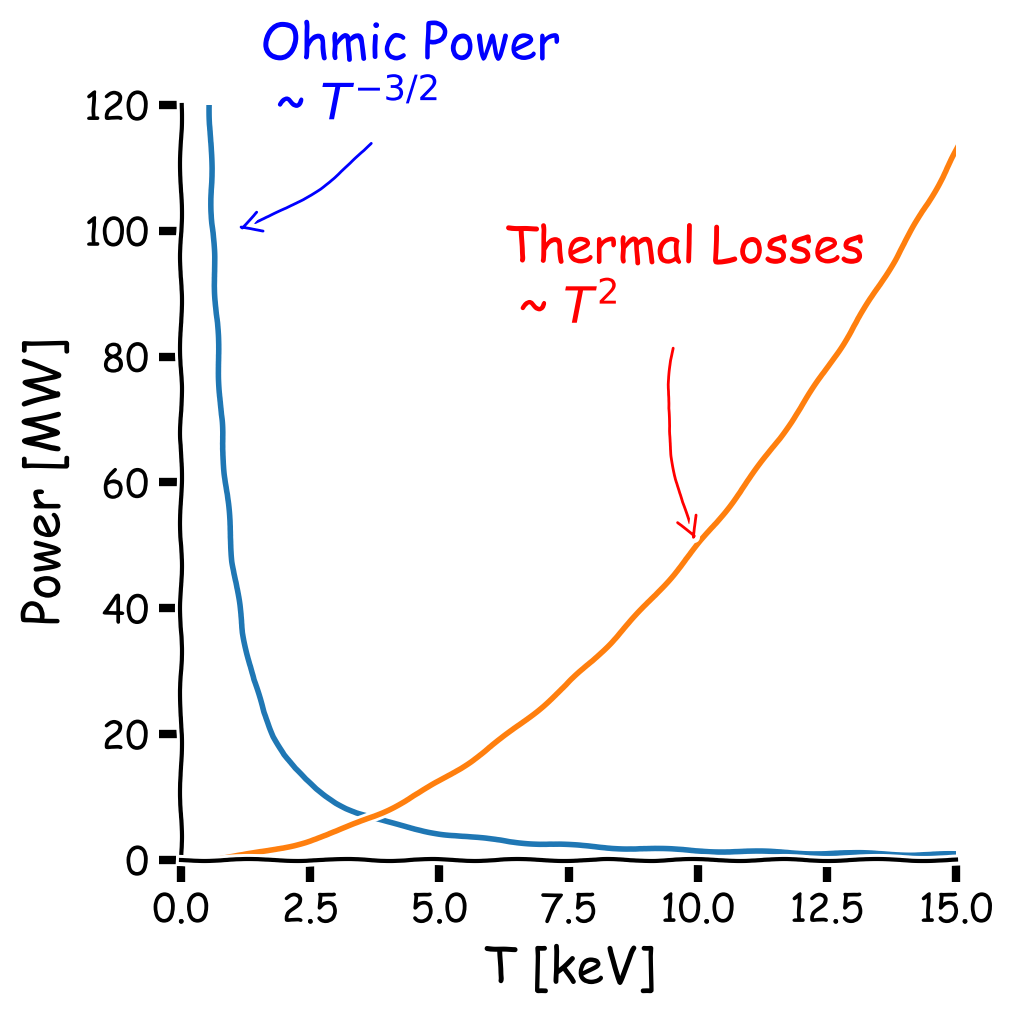

In [5]:
Ipl = 10
fig = figure(1,figsize=(5, 5), dpi=200)
plot(T/1e3, 15000*Ipl**2*T**(-3/2), lw=2)
plot(T/1e3, T**2/1e6/2, lw=2)
ylim(0, 120)
xlim(0,15)
ylabel('Power [MW]', fontsize=18)
xlabel('T [keV]', fontsize=18)
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().get_yaxis().tick_left()
gca().get_xaxis().tick_bottom()

gca().annotate('Ohmic Power \n ~ $T^{-3/2}$', xy=(1, 100), xycoords='data',
                xytext=(10, 40), textcoords='offset points', fontsize=18, color='b',
                arrowprops=dict(arrowstyle="->", color='b',
                                connectionstyle="arc3,rad=-.2")
                )

gca().annotate('Thermal Losses \n ~ $T^{2}$', xy=(10, 50), xycoords='data',
                xytext=(-70, 80), textcoords='offset points', fontsize=18, color='r',
                arrowprops=dict(arrowstyle="->", color='r',
                                connectionstyle="arc3,rad=+.2")
                )